In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
X = df.drop('sales',axis=1)

In [4]:
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poloynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [7]:
poloynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
polynomial_features = poloynomial_converter.transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
test_predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test,test_predictions)

In [17]:
MAE

0.48967980448035603

In [18]:
MSE = mean_squared_error(y_test,test_predictions)

In [19]:
RMSE = np.sqrt(MSE)

In [20]:
RMSE

0.6646431757269019

In [21]:
# finding the best order for polynomial regression 

In [24]:
# creating the different order polynomial 
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    



In [25]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

In [26]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742656422755,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

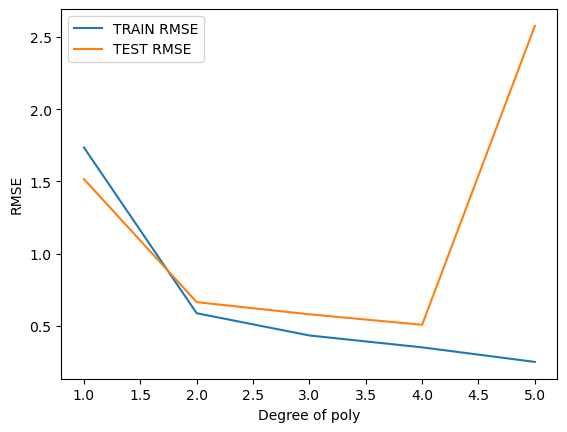

In [39]:
plt.plot(range(1,6), train_rmse_errors[:5], label= 'TRAIN RMSE')

plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST RMSE')
plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()
plt.show()




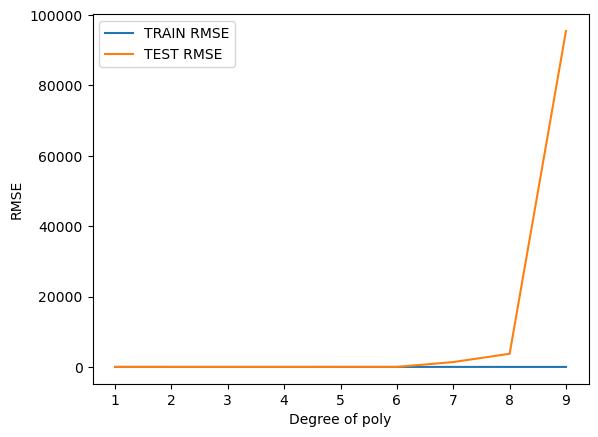

In [40]:
plt.plot(range(1,10), train_rmse_errors, label= 'TRAIN RMSE')

plt.plot(range(1,10), test_rmse_errors, label = 'TEST RMSE')
plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()
plt.show()